# Analyzing Heart Health Score and Chest Pain Level Relationship

Correlation Coefficient: -0.08
P-value: 0.1733


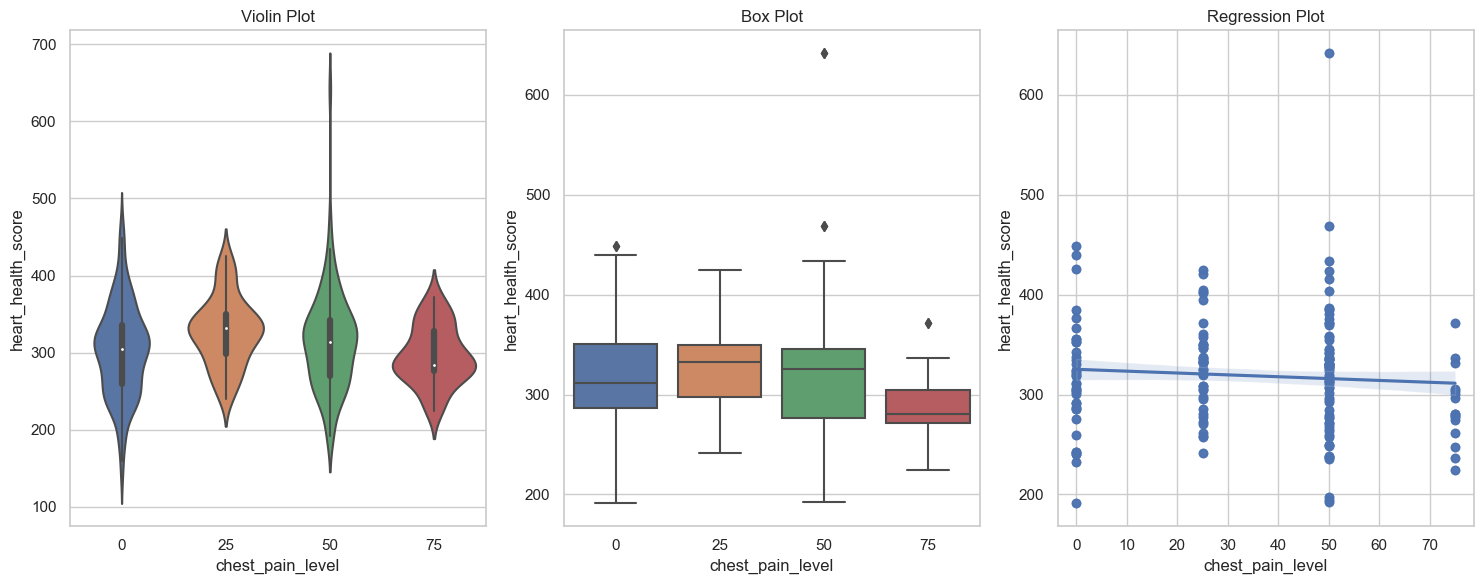


ANOVA Results:
                        df        sum_sq       mean_sq         F    PR(>F)
C(chest_pain_level)    3.0  3.977018e+04  13256.728328  3.954248  0.008604
Residual             326.0  1.092924e+06   3352.528564       NaN       NaN
No significant difference in heart health scores between different chest pain levels.

The p-value (0.0086) is less than alpha (0.05).
Reject the null hypothesis. There is a significant difference in means among the groups.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Load the dataset
# Load the dataset
df = pd.read_csv('heart_disease_dataset_with_new_features.csv')


# Filter data for patients with heart disease
heart_disease_patients = df[df['target'] == 1]

# Correlation analysis between Heart Health Score and Chest Pain Level
correlation_coefficient, p_value = pearsonr(heart_disease_patients['heart_health_score'], heart_disease_patients['chest_pain_level'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

# Visualize the relationship using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='chest_pain_level', y='heart_health_score')
plt.title('Violin Plot')

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(x='chest_pain_level', y='heart_health_score', data=heart_disease_patients)
plt.title('Box Plot')

# Regression plot
plt.subplot(1, 3, 3)
sns.regplot(x='chest_pain_level', y='heart_health_score', data=heart_disease_patients)
plt.title('Regression Plot')

plt.tight_layout()
plt.show()

# Perform statistical analysis using ANOVA
model = ols('heart_health_score ~ C(chest_pain_level)', data=heart_disease_patients).fit()
anova_results = anova_lm(model)
print("\nANOVA Results:")
print(anova_results)

# Interpret the results based on the obtained p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in heart health scores between different chest pain levels.")
else:
    print("No significant difference in heart health scores between different chest pain levels.")

# Interpret ANOVA results
alpha = 0.05
p_value_anova = anova_results['PR(>F)'][0]  # Extract p-value from ANOVA results

if p_value_anova < alpha:
    print(f"\nThe p-value ({p_value_anova:.4f}) is less than alpha ({alpha}).")
    print("Reject the null hypothesis. There is a significant difference in means among the groups.")
else:
    print(f"\nThe p-value ({p_value_anova:.4f}) is greater than alpha ({alpha}).")
    print("Fail to reject the null hypothesis. There is no significant difference in means among the groups.")
